In [1]:
# Import Libraries
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#  Data collection of cryptocurrencies - "BTC", "Ethereum", "BNB"
symbols = ["BTC-USD", "ETH-USD", "BNB-USD"]
start_date = "2020-01-01"
end_date = "2024-01-01"

In [3]:
# Download historical data 
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

[*********************100%%**********************]  3 of 3 completed


In [4]:
data.tail()

,BNB-USD,BTC-USD,ETH-USD
Date,,,
2023-12-27,323.677338,43442.855469,2378.739990
2023-12-28,323.598999,42627.855469,2347.566162
2023-12-29,313.878754,42099.402344,2300.690674
2023-12-30,317.166199,42156.902344,2292.065430
2023-12-31,312.435699,42265.187500,2281.471191


In [5]:
# Portfolio Creation
crypto_portfolio = data.copy()

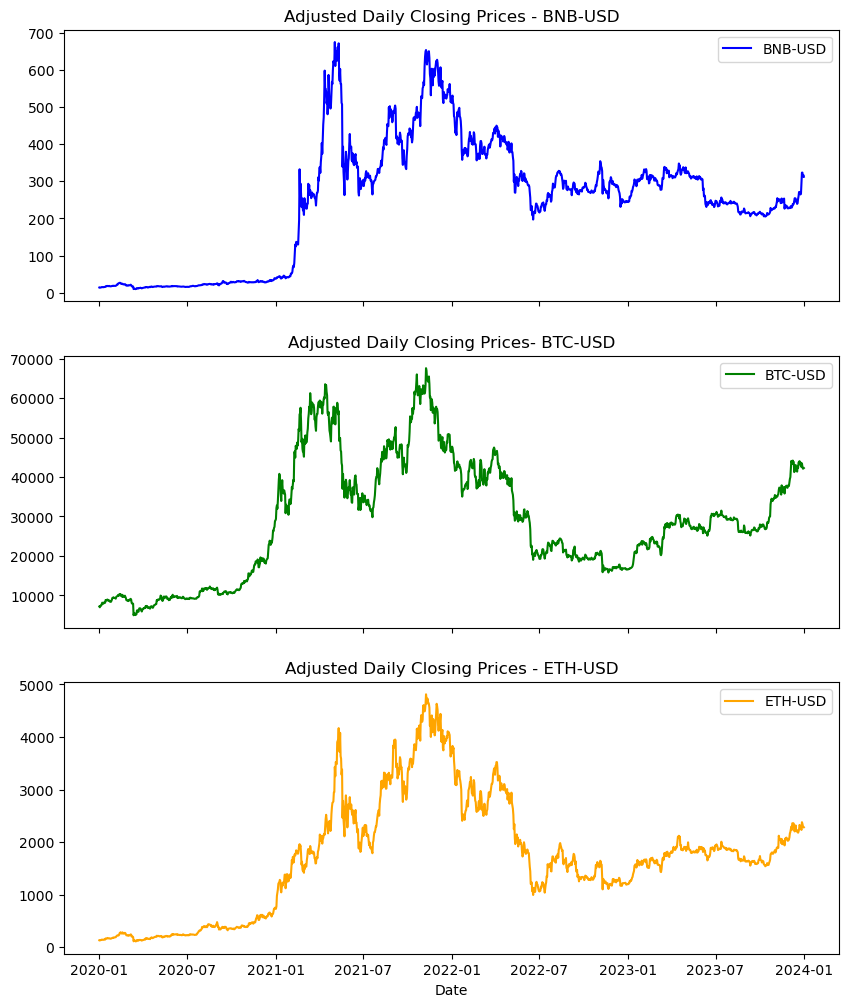

In [6]:
#  Plot Daily adj. closing prices of the Crytocurrencies
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
ax1.plot(crypto_portfolio["BNB-USD"], label="BNB-USD", color="blue")
ax1.set_title("Adjusted Daily Closing Prices - BNB-USD")
ax1.legend()

ax2.plot(crypto_portfolio["BTC-USD"], label="BTC-USD", color="green")
ax2.set_title("Adjusted Daily Closing Prices- BTC-USD")
ax2.legend()

ax3.plot(crypto_portfolio["ETH-USD"], label="ETH-USD", color="orange")
ax3.set_title("Adjusted Daily Closing Prices - ETH-USD")
ax3.legend()

plt.xlabel("Date")
plt.show()


In [7]:
# Calculate  Daily Returns
returns = crypto_portfolio.pct_change().dropna()

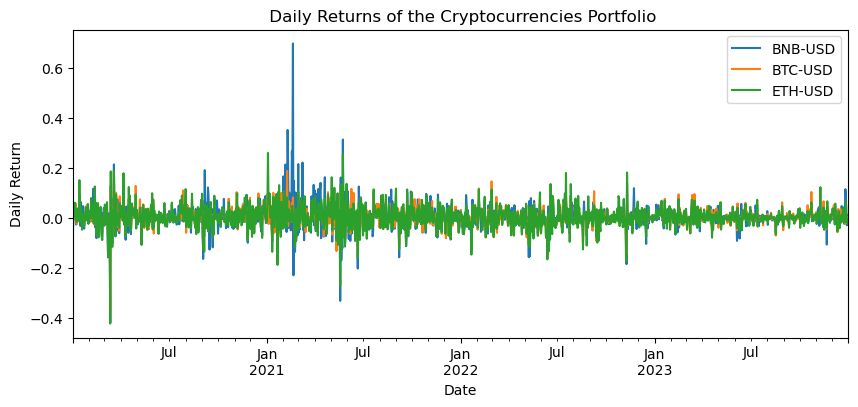

In [26]:
#Plot Daily returns
returns.plot(xlabel = "Date", ylabel = "Daily Return", title=" Daily Returns of the Cryptocurrencies Portfolio", figsize=(10, 4));

In [33]:
# Step 4: Compute Portfolio Statistics
daily_avg_return = returns.mean()
daily_sd = returns.std()
daily_variance = daily_sd**2
annual_avg_return = daily_avg_return*365
annual_sd = daily_sd*np.sqrt(365)
skewness = returns.skew()
kurtosis = returns.kurtosis()

In [34]:
pd.DataFrame([daily_avg_return,daily_sd,daily_variance,annual_avg_return,annual_sd,skewness,kurtosis],
             index= ["Average Daily Return","Daily Standard Deviation","Daily Variance", "Annual Average Return","Annual Standard Deviation","Skewness","Kurtosis"])

,BNB-USD,BTC-USD,ETH-USD
Average Daily Return,0.003398,0.001832,0.003016
Daily Standard Deviation,0.050752,0.034799,0.045420
Daily Variance,0.002576,0.001211,0.002063
Annual Average Return,1.240371,0.668858,1.100818
Annual Standard Deviation,0.969607,0.664829,0.867743
Skewness,1.741212,-0.642585,-0.426867
Kurtosis,32.642245,11.764617,8.878922


In [30]:
#Create Correlation Matrix
correlations = returns.corr()
correlations

,BNB-USD,BTC-USD,ETH-USD
BNB-USD,1.000000,0.665714,0.685813
BTC-USD,0.665714,1.000000,0.820806
ETH-USD,0.685813,0.820806,1.000000


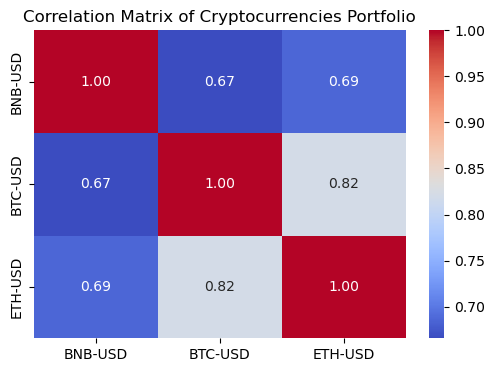

In [13]:
# Plot a heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Cryptocurrencies Portfolio")
plt.show()

In [35]:
#Create Covariance Matrix
covariances = returns.cov()
covariances

,BNB-USD,BTC-USD,ETH-USD
BNB-USD,0.002576,0.001176,0.001581
BTC-USD,0.001176,0.001211,0.001297
ETH-USD,0.001581,0.001297,0.002063


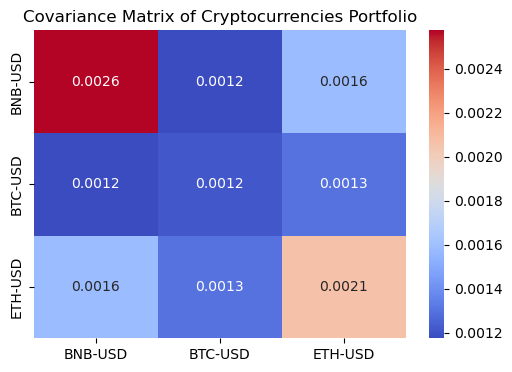

In [14]:
#  Plot a heatmap for the covariance matrix
plt.figure(figsize=(6, 4))
sns.heatmap(covariances, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Covariance Matrix of Cryptocurrencies Portfolio")
plt.show()